# Liveability scoring
Liveability score is essential to measure the importance of various factors consisted of liveability.
<br>
In this project, it is decided to use customized weights by conducting user survey via web service and scoring the liveability based on the weights.
<br>

- First, standardizate the different measurements.
- Second, Rank them by categories.
- Finally, Score and weight them.

## Read the data

In [2]:
import pandas as pd
COL = ["min_distance_to_train", "min_distance_to_hosp", "min_distance_to_poli", "min_distance_to_shop", "population_density", "crime_cases", "weekly_rent"]
sample = pd.read_csv("../../data/curated/merged_dataset/2013_merged_data.csv")
m = sample[COL].to_numpy()
m

array([[3.556825e+01, 2.135025e+01, 2.204660e+01, ..., 8.533000e+03,
        8.600000e+01, 3.000000e+02],
       [7.543550e+00, 7.429720e+00, 6.281770e+00, ..., 1.373900e+04,
        3.600000e+01, 2.150000e+02],
       [5.085341e+01, 3.663541e+01, 8.478000e-02, ..., 8.533000e+03,
        8.600000e+01, 1.750000e+02],
       ...,
       [1.288061e+01, 1.272350e+01, 1.525938e+01, ..., 1.114100e+04,
        5.424000e+03, 3.500000e+02],
       [5.286500e-01, 2.290756e+01, 2.693800e-01, ..., 8.564000e+03,
        1.140000e+02, 2.250000e+02],
       [         nan,          nan,          nan, ..., 5.269000e+03,
        2.100000e+01, 2.000000e+02]])

In [3]:
from sklearn import preprocessing
import numpy as np

## Data standardization

In [4]:
X_train = m
scaler = preprocessing.StandardScaler().fit(X_train)
# scaler
# scaler.mean_
# scaler.scale_

plot histogram

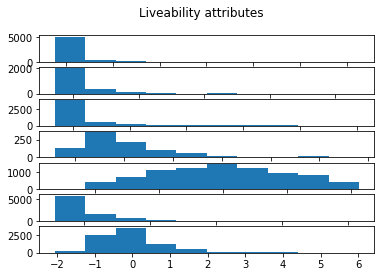

In [5]:
import matplotlib.pyplot as plt
X_scaled = scaler.transform(X_train)
X_scaled
fig, axs = plt.subplots(X_scaled.shape[1])
fig.suptitle('Liveability attributes')
for i in range(0, X_scaled.shape[1]):
    axs[i].hist(X_scaled[:,i])
plt.show()

<b>QQ-plot</b>
<br>
- In QQ-plot, there are strong evidences that most of liveability attributes are not normally distributed.
<br>
- 6th attribute has normal distribution but it is under-dispersed (more concentrated around a central value).
<br>
- Therefore, it is not recommanded to standardise using normal distribution.

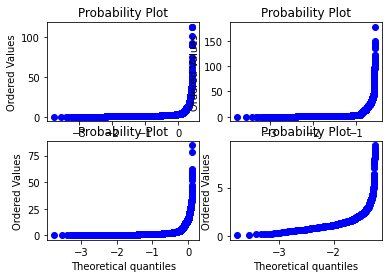

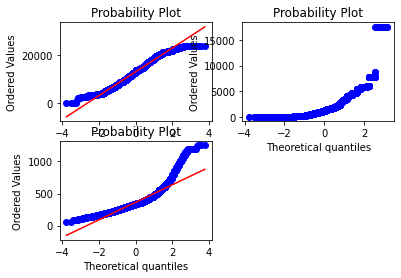

In [6]:
import numpy as np
import scipy.stats as stats
import pylab

# test = np.random.normal(0,1, 1000) # Good example
for i in range(0, 4):
    ax1 = plt.subplot(221+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

for i in range(4, X_scaled.shape[1]):
    ax1 = plt.subplot(217+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


QQ-plot expanded <b>(Log-model)</b>
- Relatively, it doesn't seem to fit well.

<ipython-input-7-702ffdf512ce>:7: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(test), line='45')


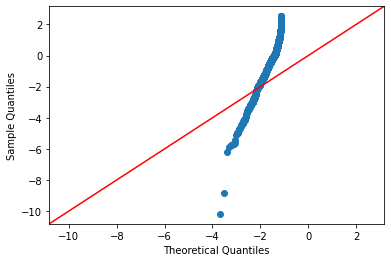

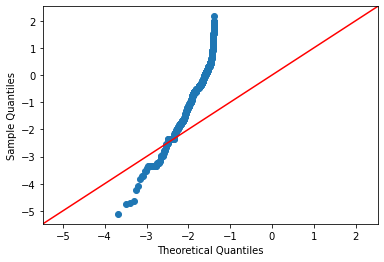

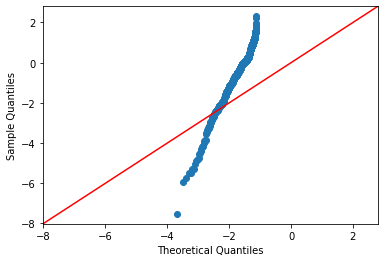

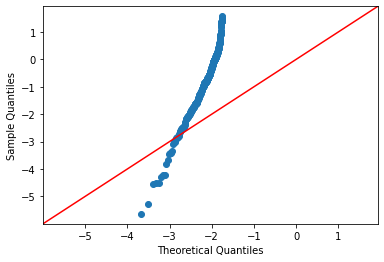

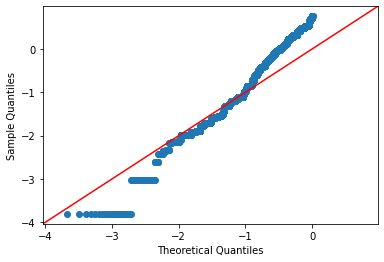

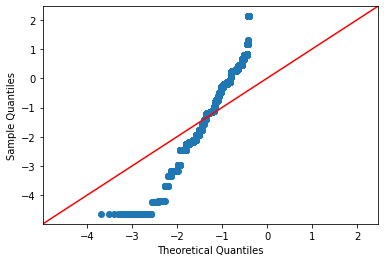

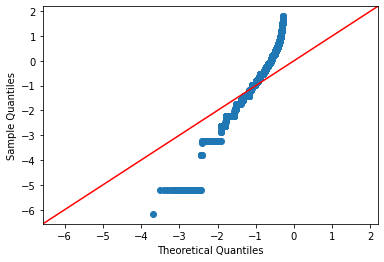

In [7]:
import numpy as np 
import statsmodels.api as sm
import pylab

for i in range(0, X_scaled.shape[1]):
    test = X_scaled[:,i]
    sm.qqplot(np.log(test), line='45')
pylab.show()
    

## Ranking
- As the attributes are not nomally distributed, it is decided to use ranking to score the liveability

In [15]:
COLS = ["address","sa2_2021","min_distance_to_train", "min_distance_to_hosp", "min_distance_to_poli", "min_distance_to_shop", "population_density", "crime_cases", "weekly_rent"]


In [48]:
ranking = pd.DataFrame()
for col in COLS:
    if col not in ["address","sa2_2021"]:
        ranking[col] = sample[col].rank(ascending=False)
    else:
        ranking[col] = sample[col]
ranking

,address,sa2_2021,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,population_density,crime_cases,weekly_rent
0,"- CHAPEL HILL ROAD, BOOROLITE",204011057,88.0,432.0,256.0,NaN,6948.0,7706.0,5534.0
1,"- LOWER NEWRY ROAD, NEWRY",205051101,747.0,813.0,983.0,NaN,4139.0,8129.5,7836.0
2,". NASH STREET, JAMIESON",204011057,29.0,172.0,4692.0,NaN,6948.0,7706.0,8311.5
3,".5528 CALDER HIGHWAY, BIG HILL",202011022,531.5,NaN,NaN,NaN,1220.0,4066.0,3772.5
4,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,2111.5,NaN,NaN,87.5,349.0,2544.0,6408.5
...,...,...,...,...,...,...,...,...,...
8567,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,3390.0,1598.0,2707.0,NaN,5018.0,2983.5,4672.5
8568,"UNIT/2/19 TOPPING STREET, SALE",205051103,5070.0,NaN,3748.0,NaN,3289.0,2314.5,3772.5
8569,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,428.0,655.0,403.0,NaN,5444.5,335.5,3772.5
8570,"WHITELAW STREET, MEENIYAN",205031087,5180.0,386.0,4617.0,NaN,6916.5,7591.0,7655.5


In [49]:
for col in COL:
    ranking[col] = ranking[col]/len(ranking[col])
score = ranking
score

,address,sa2_2021,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,population_density,crime_cases,weekly_rent
0,"- CHAPEL HILL ROAD, BOOROLITE",204011057,0.010266,0.050397,0.029865,NaN,0.810546,0.898973,0.645590
1,"- LOWER NEWRY ROAD, NEWRY",205051101,0.087144,0.094844,0.114676,NaN,0.482851,0.948378,0.914139
2,". NASH STREET, JAMIESON",204011057,0.003383,0.020065,0.547364,NaN,0.810546,0.898973,0.969610
3,".5528 CALDER HIGHWAY, BIG HILL",202011022,0.062004,NaN,NaN,NaN,0.142324,0.474335,0.440096
4,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,0.246325,NaN,NaN,0.010208,0.040714,0.296780,0.747608
...,...,...,...,...,...,...,...,...,...
8567,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,0.395474,0.186421,0.315796,NaN,0.585394,0.348052,0.545089
8568,"UNIT/2/19 TOPPING STREET, SALE",205051103,0.591461,NaN,0.437238,NaN,0.383691,0.270007,0.440096
8569,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,0.049930,0.076412,0.047014,NaN,0.635149,0.039139,0.440096
8570,"WHITELAW STREET, MEENIYAN",205031087,0.604293,0.045030,0.538614,NaN,0.806871,0.885558,0.893082


## Scoring

In [50]:
def liveability_scoring(scores, cols, weights):
    """Takes score data, list of weights and column names, return the total liveability score based on the weights"""
    # check the validation of weight list
    if len(weights) != len(cols):
        return np.nan
    if sum(weights) != 1:
        return np.nan
    
    # initialize the values
    scores["total_liveability_score"] = 0

    # calculate the total liveability
    for i, rows in scores.iterrows():
        list_sum = 0
        for n in range(0, len(cols)):
            if not np.isnan(scores.loc[i, cols[n]]):
                list_sum = list_sum + (scores.loc[i, cols[n]]*weights[n])
        scores.loc[i, "total_liveability_score"] = list_sum
    return scores

In [51]:
score

,address,sa2_2021,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,population_density,crime_cases,weekly_rent
0,"- CHAPEL HILL ROAD, BOOROLITE",204011057,0.010266,0.050397,0.029865,NaN,0.810546,0.898973,0.645590
1,"- LOWER NEWRY ROAD, NEWRY",205051101,0.087144,0.094844,0.114676,NaN,0.482851,0.948378,0.914139
2,". NASH STREET, JAMIESON",204011057,0.003383,0.020065,0.547364,NaN,0.810546,0.898973,0.969610
3,".5528 CALDER HIGHWAY, BIG HILL",202011022,0.062004,NaN,NaN,NaN,0.142324,0.474335,0.440096
4,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,0.246325,NaN,NaN,0.010208,0.040714,0.296780,0.747608
...,...,...,...,...,...,...,...,...,...
8567,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,0.395474,0.186421,0.315796,NaN,0.585394,0.348052,0.545089
8568,"UNIT/2/19 TOPPING STREET, SALE",205051103,0.591461,NaN,0.437238,NaN,0.383691,0.270007,0.440096
8569,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,0.049930,0.076412,0.047014,NaN,0.635149,0.039139,0.440096
8570,"WHITELAW STREET, MEENIYAN",205031087,0.604293,0.045030,0.538614,NaN,0.806871,0.885558,0.893082


Cacluate customized liveability

In [52]:
weights = [0.5, 0.1, 0.2, 0.1, 0, 0.1, 0]
total_score = liveability_scoring(score, COL, weights)

In [53]:
total_score

,address,sa2_2021,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,population_density,crime_cases,weekly_rent,total_liveability_score
0,"- CHAPEL HILL ROAD, BOOROLITE",204011057,0.010266,0.050397,0.029865,NaN,0.810546,0.898973,0.645590,0.106043
1,"- LOWER NEWRY ROAD, NEWRY",205051101,0.087144,0.094844,0.114676,NaN,0.482851,0.948378,0.914139,0.170829
2,". NASH STREET, JAMIESON",204011057,0.003383,0.020065,0.547364,NaN,0.810546,0.898973,0.969610,0.203068
3,".5528 CALDER HIGHWAY, BIG HILL",202011022,0.062004,NaN,NaN,NaN,0.142324,0.474335,0.440096,0.078436
4,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,0.246325,NaN,NaN,0.010208,0.040714,0.296780,0.747608,0.153861
...,...,...,...,...,...,...,...,...,...,...
8567,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,0.395474,0.186421,0.315796,NaN,0.585394,0.348052,0.545089,0.314343
8568,"UNIT/2/19 TOPPING STREET, SALE",205051103,0.591461,NaN,0.437238,NaN,0.383691,0.270007,0.440096,0.410178
8569,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,0.049930,0.076412,0.047014,NaN,0.635149,0.039139,0.440096,0.045923
8570,"WHITELAW STREET, MEENIYAN",205031087,0.604293,0.045030,0.538614,NaN,0.806871,0.885558,0.893082,0.502928


Write csv of output(Liveability)

In [54]:
import os
new_path = "../../data/curated/scoring/"

if not os.path.exists(new_path):
    os.makedirs(new_path)

total_score =total_score.sort_values(by=['total_liveability_score'], ascending=False)
total_score.to_csv(new_path+"liveability-scoring.csv")

## Analysis based on SA2
### Ranking

In [60]:
total_score

,address,sa2_2021,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,population_density,crime_cases,weekly_rent,total_liveability_score
4675,"3/6 COMYN STREET, MURTOA",215011394,0.658889,0.276132,0.541531,NaN,0.877566,0.959286,0.997900,0.561293
5486,"4 MARKET STREET, MINYIP",215011394,0.661223,0.273798,0.501283,NaN,0.877566,0.983901,0.994517,0.556638
1224,"12 ALBERT STREET, TRENTHAM",201021011,0.646640,0.274965,0.508049,NaN,0.790597,0.913672,0.440096,0.543794
1465,"13 BREEN STREET, MINYIP",215011394,0.616542,0.285114,0.535114,NaN,0.877566,0.983901,0.980810,0.542196
5361,"39 MICHIE STREET, ELMORE",202031032,0.639057,0.255716,0.526015,NaN,0.966694,0.908248,0.827170,0.541128
...,...,...,...,...,...,...,...,...,...,...
2990,"2/2A OAKFIELD COURT, FRANKSTON SOUTH",214011373,NaN,NaN,NaN,NaN,0.165364,0.008341,0.605460,0.000834
238,"1/15 HARCOURT AVENUE, FRANKSTON SOUTH",214011373,NaN,NaN,NaN,NaN,0.165364,0.008341,0.219785,0.000834
2404,"186 FRANKSTON-FLINDERS ROAD, FRANKSTON SOUTH",214011373,NaN,NaN,NaN,NaN,0.165364,0.008341,0.384391,0.000834
1304,"12 PILLARS ROAD, BANGHOLME",212041566,NaN,NaN,NaN,NaN,0.853885,0.004725,0.605460,0.000472


In [61]:
df = total_score
sa2_name = pd.read_csv('../../data/curated/sa2_vic_2021.csv')

In [62]:
sa2_name.columns

Index(['Unnamed: 0', 'SA2_NAME21', 'SA2_CODE21'], dtype='object')

In [79]:
df2 = df[['sa2_2021', 'total_liveability_score','address']]\
        .groupby(['sa2_2021'],as_index = False) \
        .agg(
            {\
                'total_liveability_score': 'mean', # count number of instances from sample
                'address': 'count',
            }
        ) \
        .rename({'address': 'num','total_liveability_score': 'averaged_total_liveability_score' }, axis=1)


In [80]:
df2 = df2.sort_values(by=['averaged_total_liveability_score'], ascending=False)
df2.head()

,sa2_2021,averaged_total_liveability_score,num
425,215011394,0.495826,14
456,217031471,0.474325,3
34,202031033,0.459304,8
35,203011034,0.455840,5
421,215011390,0.448951,19


In [82]:
# top 10 liveable suburb
df3 = df2.merge(sa2_name, how="left",left_on="sa2_2021",right_on = "SA2_CODE21").drop(columns = ['Unnamed: 0','SA2_CODE21'])
df3.head(10)

,sa2_2021,averaged_total_liveability_score,num,SA2_NAME21
0,215011394,0.495826,14,Yarriambiack
1,217031471,0.474325,3,Camperdown
2,202031033,0.459304,8,Loddon
3,203011034,0.455840,5,Bannockburn
4,215011390,0.448951,19,Nhill Region
5,209031210,0.428775,5,Hurstbridge
6,208021181,0.418316,31,Murrumbeena
7,215031403,0.417831,2,Robinvale
8,208021182,0.412210,50,Ormond - Glen Huntly
9,206051134,0.403671,12,St Kilda East


In [88]:
# top 10 liveable address
rank = total_score[['address', 'sa2_2021','total_liveability_score']].head(10)
rank = rank.merge(sa2_name, how="left",left_on="sa2_2021",right_on = "SA2_CODE21").drop(columns = ['Unnamed: 0','SA2_CODE21'])
rank.head(10)

,address,sa2_2021,total_liveability_score,SA2_NAME21
0,"3/6 COMYN STREET, MURTOA",215011394,0.561293,Yarriambiack
1,"4 MARKET STREET, MINYIP",215011394,0.556638,Yarriambiack
2,"12 ALBERT STREET, TRENTHAM",201021011,0.543794,Daylesford
3,"13 BREEN STREET, MINYIP",215011394,0.542196,Yarriambiack
4,"39 MICHIE STREET, ELMORE",202031032,0.541128,Bendigo Surrounds - North
5,"5 DARLING STREET, HEYWOOD",217011420,0.538462,Glenelg (Vic.)
6,"30 WALKER STREET, DONALD",215031400,0.536363,Buloke
7,"42 BRIDGE STREET, KORUMBURRA",205031089,0.536310,Korumburra
8,"4 WARRANOOKE STREET, WILLAURA",215011387,0.532863,Ararat Surrounds
9,"23 HALL STREET, CRESWICK",201021010,0.532005,Creswick - Clunes


### Web Experiments